In [3]:

%pip install --user pybaseball pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import statcast

plt.style.use('seaborn-v0_8')

# 데이터 다운로드 (2024년 5월 1일 ~ 5월 3일)
print("데이터를 가져오는 중입니다... 잠시만 기다려주세요!")
data = statcast(start_dt='2024-05-01', end_dt='2024-05-03')

# 결과 확인
print("\n수집 완료!")
print(f"데이터 크기: {data.shape}")
display(data.head())

데이터를 가져오는 중입니다... 잠시만 기다려주세요!
This is a large query, it may take a moment to complete


  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\seomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 33%|███▎      | 1/3 [00:01<00:02,  1.04s/it]c:\Users\seomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
c:\Users\seomi\AppData\Local\Programs\Python\Python312\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecat


수집 완료!
데이터 크기: (10343, 118)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
3331,FF,2024-05-03,97.6,-1.07,6.18,"Brito, Jhony",666971,666745,strikeout,swinging_strike,...,1,1.22,0.98,0.98,55.0,-0.614349,30.269622,19.941781,39.750188,10.237777
3504,CH,2024-05-03,91.0,-0.94,6.07,"Brito, Jhony",666971,666745,NaN,ball,...,1,2.1,1.21,1.21,55.6,<NA>,<NA>,<NA>,<NA>,<NA>
3618,FF,2024-05-03,96.5,-1.07,6.29,"Brito, Jhony",666971,666745,NaN,ball,...,1,1.19,0.68,0.68,61.2,<NA>,<NA>,<NA>,<NA>,<NA>
3741,CH,2024-05-03,90.1,-1.29,6.09,"Brito, Jhony",666971,666745,NaN,foul,...,1,2.04,1.27,1.27,55.8,20.160182,-22.407019,38.985388,26.474178,42.172734
3853,SI,2024-05-03,96.5,-1.15,6.23,"Brito, Jhony",666971,666745,NaN,foul,...,1,1.42,1.24,1.24,58.6,11.24805,3.893382,36.647957,36.082191,25.875289


In [ ]:

# 공을 가장 많이 던진 상위 5명 투수 이름을 출력
print("=== 이 기간 동안 가장 많이 던진 투수 TOP 5 ===")
top_pitchers = data['player_name'].value_counts().head(5)
print(top_pitchers)

# 자동으로 가장 위에 있는 투수를 선택
target_pitcher_name = top_pitchers.index[0]
print(f"\n선택된 분석 대상 투수: {target_pitcher_name}")

# 선택된 투수의 데이터만 필터링
my_pitcher_df = data[data['player_name'] == target_pitcher_name].copy()

# 5. CSV 파일로 저장 (과제 제출용)
my_pitcher_df.to_csv('data/pitcher_data.csv', index=False)
print(f"파일 저장 완료: data/pitcher_data.csv ({len(my_pitcher_df)}개)")

=== 이 기간 동안 가장 많이 던진 투수 TOP 5 ===
player_name
Allen, Logan         111
Greene, Hunter       109
Wheeler, Zack        106
Singer, Brady        105
Sandoval, Patrick    102
Name: count, dtype: int64

선택된 분석 대상 투수: Allen, Logan
파일 저장 완료: data/pitcher_data.csv (111개)


C:\Users\seomi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53804 (\N{HANGUL SYLLABLE TU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seomi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seomi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\seomi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


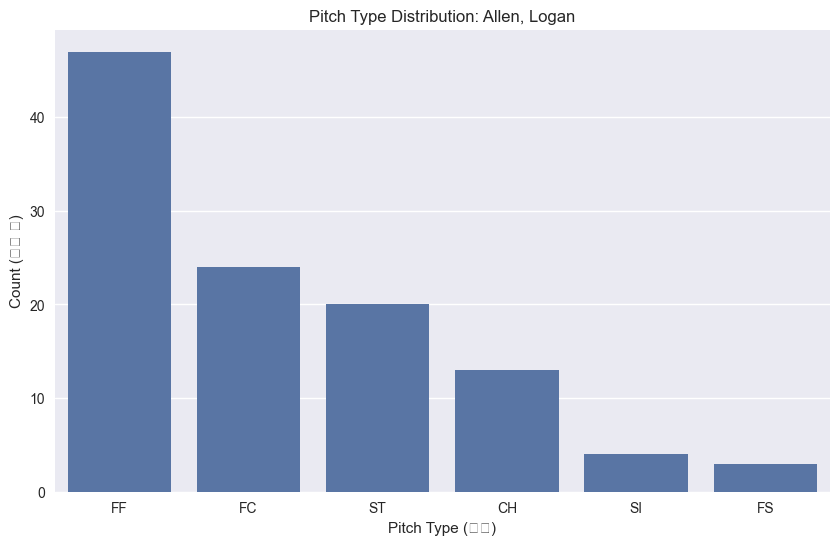

가장 높은 막대가 이 선수의 '주무기'입니다


In [10]:
# 구종 분포 시각화
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
# 투수가 던진 공의 종류별로 개수를 세서 보여줍니다.
sns.countplot(x='pitch_type', data=my_pitcher_df, 
              order=my_pitcher_df['pitch_type'].value_counts().index)

plt.title(f"Pitch Type Distribution: {target_pitcher_name}")
plt.xlabel("Pitch Type (구종)")
plt.ylabel("Count (투구 수)")
plt.show()

# 간단한 해석 출력
print("가장 높은 막대가 이 선수의 '주무기'입니다")

In [12]:
# 데이터 기본 통계 및 결측값 확인
print("=== 데이터 정보 (Info) ===")
print(my_pitcher_df.info())

print("\n=== 결측값(비어있는 값) 개수 확인 ===")
print(my_pitcher_df.isnull().sum())

print("\n=== 수치형 데이터 요약 통계 ===")
display(my_pitcher_df.describe())

=== 데이터 정보 (Info) ===
<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 4131
Columns: 118 entries, pitch_type to intercept_ball_minus_batter_pos_y_inches
dtypes: Float64(42), Int64(59), datetime64[ns](1), object(16)
memory usage: 114.1+ KB
None

=== 결측값(비어있는 값) 개수 확인 ===
pitch_type                                   0
game_date                                    0
release_speed                                0
release_pos_x                                0
release_pos_z                                0
                                            ..
attack_angle                                54
attack_direction                            54
swing_path_tilt                             54
intercept_ball_minus_batter_pos_x_inches    54
intercept_ball_minus_batter_pos_y_inches    54
Length: 118, dtype: int64

=== 수치형 데이터 요약 통계 ===


,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
count,111,111.0,111.0,111.0,111.0,111.0,0.0,0.0,0.0,0.0,...,111.0,111.0,111.0,111.0,111.0,57.0,57.0,57.0,57.0,57.0
mean,2024-05-01 21:11:21.081081088,86.263964,2.071441,5.551712,634531.072072,670218.837838,<NA>,<NA>,<NA>,<NA>,...,1.117117,2.324144,0.027477,-0.12009,43.801802,11.218461,-3.771569,31.566341,38.445108,31.012479
min,2024-05-01 00:00:00,77.1,1.09,5.31,500743.0,663531.0,<NA>,<NA>,<NA>,<NA>,...,1.0,1.05,-1.6,-1.6,36.1,-9.561021,-38.12536,15.539469,23.949089,2.910842
25%,2024-05-02 00:00:00,82.15,2.015,5.455,608324.0,671106.0,<NA>,<NA>,<NA>,<NA>,...,1.0,1.375,-0.46,-0.66,41.8,5.858866,-15.094617,27.174513,34.237095,22.329614
50%,2024-05-02 00:00:00,86.9,2.1,5.5,665161.0,671106.0,<NA>,<NA>,<NA>,<NA>,...,1.0,2.29,0.25,-0.25,43.6,13.148221,-4.383474,30.663836,38.338694,31.366723
75%,2024-05-02 00:00:00,90.8,2.195,5.57,673237.0,671106.0,<NA>,<NA>,<NA>,<NA>,...,1.0,3.135,0.645,0.485,45.5,16.882843,5.821188,36.192585,43.710086,41.421395
max,2024-05-02 00:00:00,92.7,2.39,6.28,681624.0,671106.0,<NA>,<NA>,<NA>,<NA>,...,2.0,4.12,1.23,1.56,52.6,31.369939,30.772943,55.588494,54.027074,51.951835
std,NaN,5.031804,0.202856,0.186015,58646.190412,2446.862241,<NA>,<NA>,<NA>,<NA>,...,0.323018,0.967191,0.758276,0.749127,3.098005,9.956672,16.506053,7.948575,7.103149,11.260228
